In [19]:
import pandas as pd
import os

# Ana veriyi oku
df = pd.read_csv("airpol_test.csv")  # Ana CSV osyanın adı neyse yaz

# Yeni hava durumu ortalama kolonlarını tutacak liste
weather_columns = [
    "temperature_2m", "wind_speed_10m", "wind_speed_100m",
    "wind_direction_10m", "wind_direction_100m",
    "precipitation", "relative_humidity_2m", "surface_pressure",
    "cloud_cover", "cloud_cover_low", "cloud_cover_mid", "cloud_cover_high"
]

# Her kolona boş değerle başla
for col in weather_columns:
    df[col + "_mean"] = None

# Her satır için ilgili weather CSV dosyasını oku ve ortalamaları hesapla
for idx, row in df.iterrows():
    file_id = f"id_{row['id']}.0.csv"
    file_path = os.path.join("test_weather_outputs", file_id)

    if os.path.exists(file_path):
        weather_df = pd.read_csv(file_path)

        for col in weather_columns:
            if col in weather_df.columns:
                df.at[idx, col + "_mean"] = weather_df[col].mean()
            else:
                print(f"Uyarı: {col} kolonu {file_id} içinde yok.")
    else:
        print(f"Hata: Dosya bulunamadı: {file_path}")

# Ortalamaları sayısal değerlere çevir
df[ [col + "_mean" for col in weather_columns] ] = df[ [col + "_mean" for col in weather_columns] ].astype(float)

# Sonuç
df.reset_index(drop=True, inplace=True)


In [20]:
df.head()

,id,latitude,longitude,day_of_year,day_of_week,hour,month,temperature_2m_mean,wind_speed_10m_mean,wind_speed_100m_mean,wind_direction_10m_mean,wind_direction_100m_mean,precipitation_mean,relative_humidity_2m_mean,surface_pressure_mean,cloud_cover_mean,cloud_cover_low_mean,cloud_cover_mid_mean,cloud_cover_high_mean
0,0,-42.343,147.372,31,4,15,1,14.423543,18.198030,27.960992,204.850741,212.389064,0.053091,66.860355,959.200450,55.086022,30.927419,22.661290,26.530914
1,1,37.053,127.406,28,1,12,1,-1.051409,9.170616,15.827320,203.237196,212.180353,0.036828,67.112059,1012.362324,51.184140,27.016129,29.323925,26.120968
2,2,49.105,-123.189,14,1,2,1,3.128764,12.208699,21.194252,124.034638,132.079035,0.356452,82.945377,1013.716115,87.368280,53.823925,64.142473,66.490591
3,3,42.014,12.774,10,4,3,1,8.902548,7.639687,12.258187,135.977440,153.169654,0.075538,81.300091,997.677986,59.071237,25.297043,28.061828,43.840054
4,4,47.778,13.002,31,4,11,1,3.937691,6.914289,11.275967,179.927905,194.714867,0.137634,75.234595,967.132567,68.420699,27.736559,45.842742,49.954301


In [22]:
df.head()

,id,latitude,longitude,day_of_year,day_of_week,hour,month,temperature_2m_mean,wind_speed_10m_mean,wind_speed_100m_mean,wind_direction_10m_mean,wind_direction_100m_mean,precipitation_mean,relative_humidity_2m_mean,surface_pressure_mean,cloud_cover_mean,cloud_cover_low_mean,cloud_cover_mid_mean,cloud_cover_high_mean
0,0,-42.343,147.372,31,4,15,1,14.423543,18.198030,27.960992,204.850741,212.389064,0.053091,66.860355,959.200450,55.086022,30.927419,22.661290,26.530914
1,1,37.053,127.406,28,1,12,1,-1.051409,9.170616,15.827320,203.237196,212.180353,0.036828,67.112059,1012.362324,51.184140,27.016129,29.323925,26.120968
2,2,49.105,-123.189,14,1,2,1,3.128764,12.208699,21.194252,124.034638,132.079035,0.356452,82.945377,1013.716115,87.368280,53.823925,64.142473,66.490591
3,3,42.014,12.774,10,4,3,1,8.902548,7.639687,12.258187,135.977440,153.169654,0.075538,81.300091,997.677986,59.071237,25.297043,28.061828,43.840054
4,4,47.778,13.002,31,4,11,1,3.937691,6.914289,11.275967,179.927905,194.714867,0.137634,75.234595,967.132567,68.420699,27.736559,45.842742,49.954301


In [23]:
df.columns

Index(['id', 'latitude', 'longitude', 'day_of_year', 'day_of_week', 'hour',
       'month', 'temperature_2m_mean', 'wind_speed_10m_mean',
       'wind_speed_100m_mean', 'wind_direction_10m_mean',
       'wind_direction_100m_mean', 'precipitation_mean',
       'relative_humidity_2m_mean', 'surface_pressure_mean',
       'cloud_cover_mean', 'cloud_cover_low_mean', 'cloud_cover_mid_mean',
       'cloud_cover_high_mean'],
      dtype='object')

In [24]:
import numpy as np
import pandas as pd

def cyclical_transform(df):
    # Saat (0-23)
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

    # Gün (haftalık, 0-6)
    df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

    # Gün (yıllık, 1-365)
    df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
    df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

    # Ay (1-12)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    
    return df

In [25]:
df = cyclical_transform(df)

In [26]:
df.head()

,id,latitude,longitude,day_of_year,day_of_week,hour,month,temperature_2m_mean,wind_speed_10m_mean,wind_speed_100m_mean,...,cloud_cover_mid_mean,cloud_cover_high_mean,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,day_of_year_sin,day_of_year_cos,month_sin,month_cos
0,0,-42.343,147.372,31,4,15,1,14.423543,18.198030,27.960992,...,22.661290,26.530914,-7.071068e-01,-0.707107,-0.433884,-0.900969,0.508671,0.860961,0.5,0.866025
1,1,37.053,127.406,28,1,12,1,-1.051409,9.170616,15.827320,...,29.323925,26.120968,1.224647e-16,-1.000000,0.781831,0.623490,0.463550,0.886071,0.5,0.866025
2,2,49.105,-123.189,14,1,2,1,3.128764,12.208699,21.194252,...,64.142473,66.490591,5.000000e-01,0.866025,0.781831,0.623490,0.238673,0.971100,0.5,0.866025
3,3,42.014,12.774,10,4,3,1,8.902548,7.639687,12.258187,...,28.061828,43.840054,7.071068e-01,0.707107,-0.433884,-0.900969,0.171293,0.985220,0.5,0.866025
4,4,47.778,13.002,31,4,11,1,3.937691,6.914289,11.275967,...,45.842742,49.954301,2.588190e-01,-0.965926,-0.433884,-0.900969,0.508671,0.860961,0.5,0.866025


In [27]:
def add_binary_time_features(df):
    df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x in [0, 6] else 0) 
    df['is_night'] = df['hour'].apply(lambda x: 1 if (x >= 22 or x < 7) else 0)
    return df

df = add_binary_time_features(df)

In [28]:
df.head()

,id,latitude,longitude,day_of_year,day_of_week,hour,month,temperature_2m_mean,wind_speed_10m_mean,wind_speed_100m_mean,...,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,day_of_year_sin,day_of_year_cos,month_sin,month_cos,is_weekend,is_night
0,0,-42.343,147.372,31,4,15,1,14.423543,18.198030,27.960992,...,-7.071068e-01,-0.707107,-0.433884,-0.900969,0.508671,0.860961,0.5,0.866025,0,0
1,1,37.053,127.406,28,1,12,1,-1.051409,9.170616,15.827320,...,1.224647e-16,-1.000000,0.781831,0.623490,0.463550,0.886071,0.5,0.866025,0,0
2,2,49.105,-123.189,14,1,2,1,3.128764,12.208699,21.194252,...,5.000000e-01,0.866025,0.781831,0.623490,0.238673,0.971100,0.5,0.866025,0,1
3,3,42.014,12.774,10,4,3,1,8.902548,7.639687,12.258187,...,7.071068e-01,0.707107,-0.433884,-0.900969,0.171293,0.985220,0.5,0.866025,0,1
4,4,47.778,13.002,31,4,11,1,3.937691,6.914289,11.275967,...,2.588190e-01,-0.965926,-0.433884,-0.900969,0.508671,0.860961,0.5,0.866025,0,0


In [29]:
df.columns

Index(['id', 'latitude', 'longitude', 'day_of_year', 'day_of_week', 'hour',
       'month', 'temperature_2m_mean', 'wind_speed_10m_mean',
       'wind_speed_100m_mean', 'wind_direction_10m_mean',
       'wind_direction_100m_mean', 'precipitation_mean',
       'relative_humidity_2m_mean', 'surface_pressure_mean',
       'cloud_cover_mean', 'cloud_cover_low_mean', 'cloud_cover_mid_mean',
       'cloud_cover_high_mean', 'hour_sin', 'hour_cos', 'day_of_week_sin',
       'day_of_week_cos', 'day_of_year_sin', 'day_of_year_cos', 'month_sin',
       'month_cos', 'is_weekend', 'is_night'],
      dtype='object')

In [30]:
def assign_season(df):
    def get_season(month):
        if month in [12, 1, 2]:
            return 'winter'
        elif month in [3, 4, 5]:
            return 'spring'
        elif month in [6, 7, 8]:
            return 'summer'
        else:
            return 'autumn'

    df['season'] = df['month'].apply(get_season)
    return df

In [31]:
df = assign_season(df)

df['season'] = df['season'].map({
    'winter': 0, 'spring': 1, 'summer': 2, 'autumn': 3
})

In [32]:
df.head()

,id,latitude,longitude,day_of_year,day_of_week,hour,month,temperature_2m_mean,wind_speed_10m_mean,wind_speed_100m_mean,...,hour_cos,day_of_week_sin,day_of_week_cos,day_of_year_sin,day_of_year_cos,month_sin,month_cos,is_weekend,is_night,season
0,0,-42.343,147.372,31,4,15,1,14.423543,18.198030,27.960992,...,-0.707107,-0.433884,-0.900969,0.508671,0.860961,0.5,0.866025,0,0,0
1,1,37.053,127.406,28,1,12,1,-1.051409,9.170616,15.827320,...,-1.000000,0.781831,0.623490,0.463550,0.886071,0.5,0.866025,0,0,0
2,2,49.105,-123.189,14,1,2,1,3.128764,12.208699,21.194252,...,0.866025,0.781831,0.623490,0.238673,0.971100,0.5,0.866025,0,1,0
3,3,42.014,12.774,10,4,3,1,8.902548,7.639687,12.258187,...,0.707107,-0.433884,-0.900969,0.171293,0.985220,0.5,0.866025,0,1,0
4,4,47.778,13.002,31,4,11,1,3.937691,6.914289,11.275967,...,-0.965926,-0.433884,-0.900969,0.508671,0.860961,0.5,0.866025,0,0,0


In [33]:
df.columns

Index(['id', 'latitude', 'longitude', 'day_of_year', 'day_of_week', 'hour',
       'month', 'temperature_2m_mean', 'wind_speed_10m_mean',
       'wind_speed_100m_mean', 'wind_direction_10m_mean',
       'wind_direction_100m_mean', 'precipitation_mean',
       'relative_humidity_2m_mean', 'surface_pressure_mean',
       'cloud_cover_mean', 'cloud_cover_low_mean', 'cloud_cover_mid_mean',
       'cloud_cover_high_mean', 'hour_sin', 'hour_cos', 'day_of_week_sin',
       'day_of_week_cos', 'day_of_year_sin', 'day_of_year_cos', 'month_sin',
       'month_cos', 'is_weekend', 'is_night', 'season'],
      dtype='object')

Elbow hesaplanıyor: 100%|██████████| 300/300 [00:09<00:00, 32.04it/s]


🔍 Otomatik olarak tespit edilen optimum küme sayısı: 9


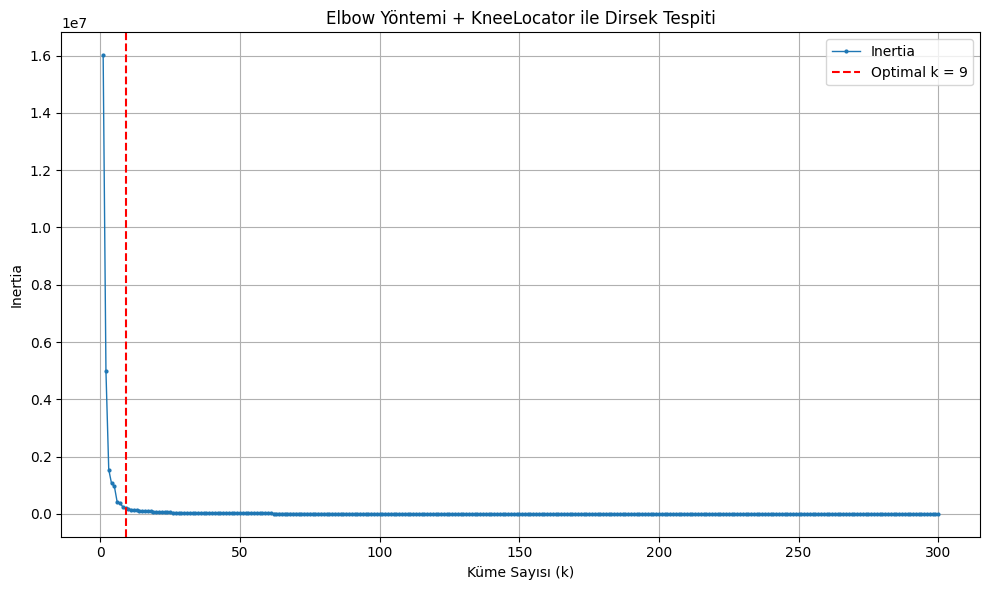

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm import tqdm
from kneed import KneeLocator

# Enlem-boylam verisi
coords = df[['latitude', 'longitude']].copy()

# Küme sayısı aralığı
K_range = range(1, 301)
inertia = []

# Inertia hesapla
for k in tqdm(K_range, desc="Elbow hesaplanıyor"):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(coords)
    inertia.append(kmeans.inertia_)

# Otomatik dirsek noktası (optimal k) tespiti
knee = KneeLocator(K_range, inertia, curve="convex", direction="decreasing")
optimal_k = knee.knee
print(f"🔍 Otomatik olarak tespit edilen optimum küme sayısı: {optimal_k}")

# Elbow grafiği + dirsek noktası
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', markersize=2, linewidth=1, label='Inertia')
plt.axvline(optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia')
plt.title('Elbow Yöntemi + KneeLocator ile Dirsek Tespiti')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(coords)

In [36]:
df.columns

Index(['id', 'latitude', 'longitude', 'day_of_year', 'day_of_week', 'hour',
       'month', 'temperature_2m_mean', 'wind_speed_10m_mean',
       'wind_speed_100m_mean', 'wind_direction_10m_mean',
       'wind_direction_100m_mean', 'precipitation_mean',
       'relative_humidity_2m_mean', 'surface_pressure_mean',
       'cloud_cover_mean', 'cloud_cover_low_mean', 'cloud_cover_mid_mean',
       'cloud_cover_high_mean', 'hour_sin', 'hour_cos', 'day_of_week_sin',
       'day_of_week_cos', 'day_of_year_sin', 'day_of_year_cos', 'month_sin',
       'month_cos', 'is_weekend', 'is_night', 'season', 'cluster'],
      dtype='object')

In [37]:
df.to_csv("nmsairpol_test.csv", index=False)